Convergence reached after 3 iterations.
Silhouette Score for K-Medoids: 0.4579
Silhouette Score for K-Means: 0.4787
Adjusted Rand Index for K-Medoids: 0.6312
Adjusted Rand Index for K-Means: 0.4290
Purity for K-Medoids: 0.8400
Purity for K-Means: 0.6667
Accuracy for K-Medoids: 0.8400
Accuracy for K-Means: 0.0000


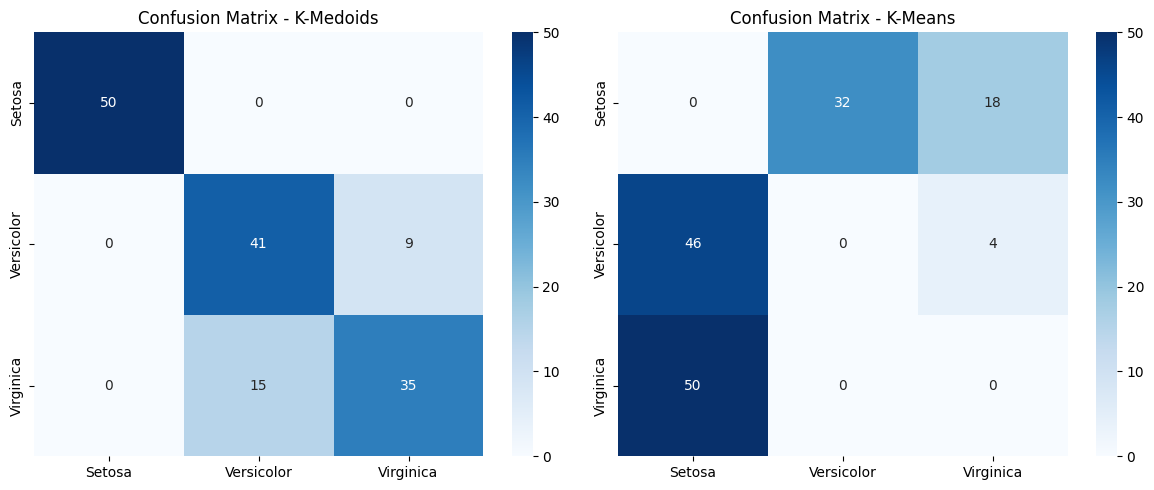

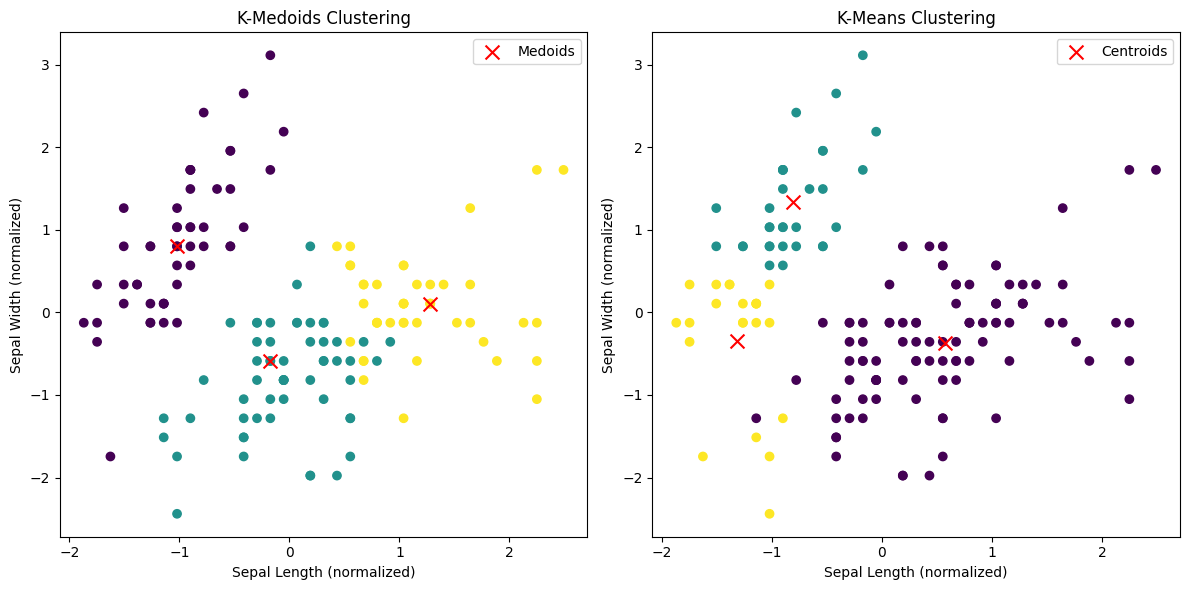

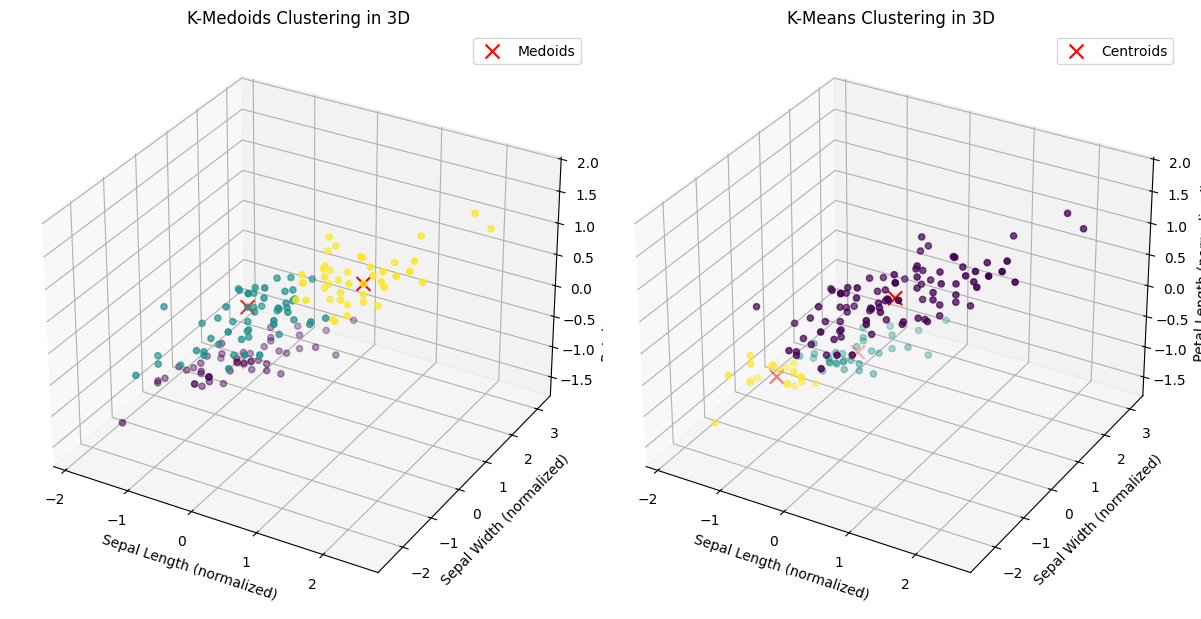

In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, adjusted_rand_score, normalized_mutual_info_score, davies_bouldin_score, calinski_harabasz_score  # For evaluation metrics
import numpy as np  # For numerical operations
import random  # For random sampling
import matplotlib.pyplot as plt  # For plotting
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import seaborn as sns  # For advanced plotting
from scipy.spatial.distance import cdist  # For computing distance metrics

# Load the dataset
iris_df = pd.read_csv('./Iris.csv')  # Read the Iris dataset from a CSV file

# Normalize the Iris dataset (excluding 'Id' and 'Species' columns) (INSTRUCTION #1: Normalize the Iris dataset.)
features = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Select feature columns
scaler = StandardScaler()  # Initialize the StandardScaler
normalized_features = scaler.fit_transform(features)  # Fit and transform the features

# Custom implementation of k-medoids clustering with convergence diagnostics
def k_medoids_clustering(X, k, max_iter=300):
    # Randomly initialize medoids
    medoids_idx = random.sample(range(X.shape[0]), k)  # Randomly select initial medoids indices
    medoids = X[medoids_idx]  # Get the initial medoids
    
    for iteration in range(max_iter):
        # Assign each point to the nearest medoid
        distances = cdist(X, medoids, 'euclidean')  # Compute distances between points and medoids
        clusters = np.argmin(distances, axis=1)  # Assign each point to the closest medoid
        
        new_medoids = np.copy(medoids)  # Copy current medoids to update
        
        for i in range(k):
            # Select the point with the smallest sum of distances to all other points in the cluster as the new medoid
            cluster_points = X[clusters == i]  # Points in the current cluster
            if len(cluster_points) > 0:  # Check if the cluster is not empty
                medoid_distances = cdist(cluster_points, cluster_points, 'euclidean')  # Compute pairwise distances within the cluster
                total_distances = np.sum(medoid_distances, axis=1)  # Sum distances for each point
                new_medoids[i] = cluster_points[np.argmin(total_distances)]  # Select the point with the smallest total distance as the new medoid
            else:
                print(f"Warning: Cluster {i} is empty. Reinitializing medoid.")  # Warn if cluster is empty
                new_medoids[i] = X[random.randint(0, X.shape[0]-1)]  # Reinitialize with a random point
        
        # Check for convergence (if medoids do not change)
        if np.all(medoids == new_medoids):
            print(f"Convergence reached after {iteration+1} iterations.")  # Print convergence message
            break
        medoids = new_medoids  # Update medoids
    else:
        print("Maximum iterations reached without convergence.")  # Print message if max iterations reached
    
    return clusters, medoids  # Return the cluster assignments and medoids

# Apply k-medoids clustering with k=3 using the custom implementation (INSTRUCTION #2: Apply k-medoids clustering with k=3.)
kmedoids_clusters, medoids = k_medoids_clustering(normalized_features, k=3)  # Perform k-medoids clustering

# Apply k-means clustering with k=3 for comparison
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize K-Means with 3 clusters
kmeans_clusters = kmeans.fit_predict(normalized_features)  # Fit and predict clusters
centroids = kmeans.cluster_centers_  # Get cluster centroids

# Calculate silhouette scores for both clustering methods (INSTRUCTION #5: Compare the performance of k-means and k-medoids using silhouette scores and other clustering metrics.)
silhouette_kmedoids = silhouette_score(normalized_features, kmedoids_clusters)  # Silhouette score for k-medoids
silhouette_kmeans = silhouette_score(normalized_features, kmeans_clusters)  # Silhouette score for k-means

print(f"Silhouette Score for K-Medoids: {silhouette_kmedoids:.4f}")  # Print silhouette score for k-medoids
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")  # Print silhouette score for k-means

# Compare cluster assignments with actual class labels (INSTRUCTION #4: Compare the cluster assignments with the actual class labels.)
actual_labels = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values  # Map species names to numerical labels

# Additional metrics for comparison
ari_kmedoids = adjusted_rand_score(actual_labels, kmedoids_clusters)  # Adjusted Rand Index for k-medoids
ari_kmeans = adjusted_rand_score(actual_labels, kmeans_clusters)  # Adjusted Rand Index for k-means

print(f"Adjusted Rand Index for K-Medoids: {ari_kmedoids:.4f}")  # Print ARI for k-medoids
print(f"Adjusted Rand Index for K-Means: {ari_kmeans:.4f}")  # Print ARI for k-means

# Purity calculation
def calculate_purity(y_true, y_pred):
    contingency_matrix = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)  # Compute purity

purity_kmedoids = calculate_purity(actual_labels, kmedoids_clusters)  # Purity for k-medoids
purity_kmeans = calculate_purity(actual_labels, kmeans_clusters)  # Purity for k-means

print(f"Purity for K-Medoids: {purity_kmedoids:.4f}")  # Print purity for k-medoids
print(f"Purity for K-Means: {purity_kmeans:.4f}")  # Print purity for k-means

# Accuracy (Note: accuracy is not typically used for unsupervised learning but can give an idea)
accuracy_kmedoids = accuracy_score(actual_labels, kmedoids_clusters)  # Accuracy for k-medoids
accuracy_kmeans = accuracy_score(actual_labels, kmeans_clusters)  # Accuracy for k-means

print(f"Accuracy for K-Medoids: {accuracy_kmedoids:.4f}")  # Print accuracy for k-medoids
print(f"Accuracy for K-Means: {accuracy_kmeans:.4f}")  # Print accuracy for k-means

# Confusion matrices
conf_matrix_kmedoids = confusion_matrix(actual_labels, kmedoids_clusters)  # Confusion matrix for k-medoids
conf_matrix_kmeans = confusion_matrix(actual_labels, kmeans_clusters)  # Confusion matrix for k-means

# Visualization of confusion matrices
plt.figure(figsize=(12, 5))  # Set figure size

plt.subplot(1, 2, 1)  # Create subplot for k-medoids
sns.heatmap(conf_matrix_kmedoids, annot=True, cmap='Blues', fmt='d', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])  # Plot confusion matrix
plt.title('Confusion Matrix - K-Medoids')  # Set title

plt.subplot(1, 2, 2)  # Create subplot for k-means
sns.heatmap(conf_matrix_kmeans, annot=True, cmap='Blues', fmt='d', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])  # Plot confusion matrix
plt.title('Confusion Matrix - K-Means')  # Set title

plt.tight_layout()  # Adjust layout
plt.show()  # Display plots

# Visualization of clusters in 2D (INSTRUCTION #3: Visualize the cluster assignments and the medoids in 2D and 3D plots.)
plt.figure(figsize=(12, 6))  # Set figure size

plt.subplot(1, 2, 1)  # Create subplot for k-medoids
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=kmedoids_clusters, cmap='viridis', marker='o')  # Scatter plot for k-medoids
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=100, label='Medoids')  # Plot medoids
plt.title('K-Medoids Clustering')  # Set title
plt.xlabel('Sepal Length (normalized)')  # Set x-axis label
plt.ylabel('Sepal Width (normalized)')  # Set y-axis label
plt.legend()  # Add legend

plt.subplot(1, 2, 2)  # Create subplot for k-means
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=kmeans_clusters, cmap='viridis', marker='o')  # Scatter plot for k-means
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')  # Plot centroids
plt.title('K-Means Clustering')  # Set title
plt.xlabel('Sepal Length (normalized)')  # Set x-axis label
plt.ylabel('Sepal Width (normalized)')  # Set y-axis label
plt.legend()  # Add legend

plt.tight_layout()  # Adjust layout
plt.show()  # Display plots

# Visualization of clusters in 3D (INSTRUCTION #3: Visualize the cluster assignments and the medoids in 2D and 3D plots.)
fig = plt.figure(figsize=(12, 8))  # Set figure size

# K-Medoids 3D visualization
ax = fig.add_subplot(121, projection='3d')  # Create 3D subplot for k-medoids
ax.scatter(normalized_features[:, 0], normalized_features[:, 1], normalized_features[:, 2], c=kmedoids_clusters, cmap='viridis', marker='o')  # Scatter plot for k-medoids
ax.scatter(medoids[:, 0], medoids[:, 1], medoids[:, 2], c='red', marker='x', s=100, label='Medoids')  # Plot medoids
ax.set_title('K-Medoids Clustering in 3D')  # Set title
ax.set_xlabel('Sepal Length (normalized)')  # Set x-axis label
ax.set_ylabel('Sepal Width (normalized)')  # Set y-axis label
ax.set_zlabel('Petal Length (normalized)')  # Set z-axis label
ax.legend()  # Add legend

# K-Means 3D visualization
ax = fig.add_subplot(122, projection='3d')  # Create 3D subplot for k-means
ax.scatter(normalized_features[:, 0], normalized_features[:, 1], normalized_features[:, 2], c=kmeans_clusters, cmap='viridis', marker='o')  # Scatter plot for k-means
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=100, label='Centroids')  # Plot centroids
ax.set_title('K-Means Clustering in 3D')  # Set title
ax.set_xlabel('Sepal Length (normalized)')  # Set x-axis label
ax.set_ylabel('Sepal Width (normalized)')  # Set y-axis label
ax.set_zlabel('Petal Length (normalized)')  # Set z-axis label
ax.legend()  # Add legend

plt.tight_layout()  # Adjust layout
plt.show()  # Display plot
